In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('diabetes_csv.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Ecplonating Data Analysis(EDA)

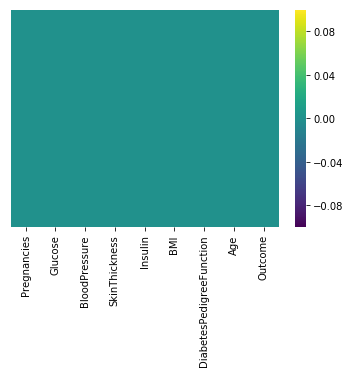

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')  # it shows that no data is missing (if data is missing it will show while dots)

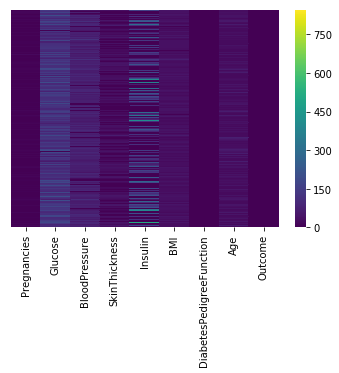

In [6]:
sns.heatmap(df,yticklabels=False,cmap='viridis')  # show the data intesity

In [7]:
sns.set_style('whitegrid')

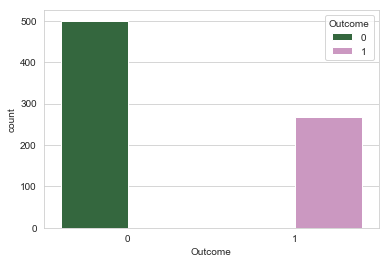

In [8]:
sns.countplot(x='Outcome',hue='Outcome',data=df,palette='cubehelix')

Text(0.5, 0, 'Outcome')

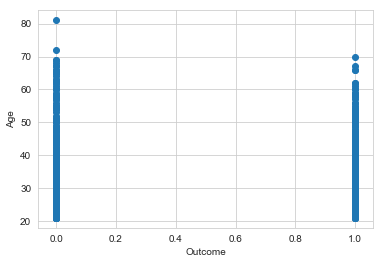

In [9]:
plt.scatter(x='Outcome',y='Age',data=df)
plt.ylabel('Age')
plt.xlabel('Outcome')

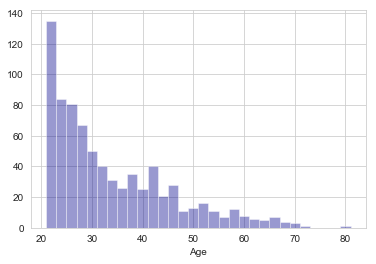

In [10]:
sns.distplot(df['Age'],kde=False,color='darkblue',bins=30)  # kde is gaussion kernal density

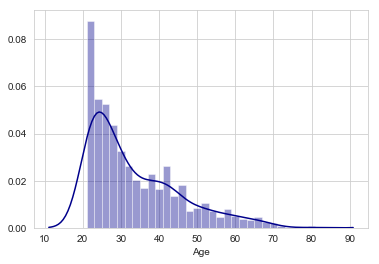

In [11]:
sns.distplot(df['Age'],kde=True,color='darkblue',bins=30)

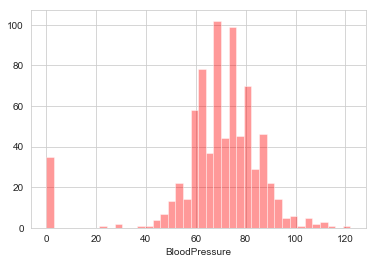

In [12]:
sns.distplot(df['BloodPressure'],kde=False,color='red',bins=40)

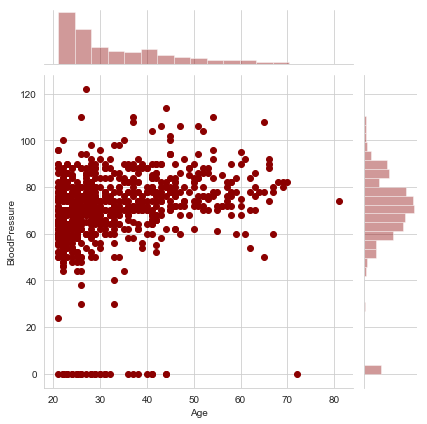

In [13]:
sns.jointplot(x='Age',y='BloodPressure',data=df,color='darkred')


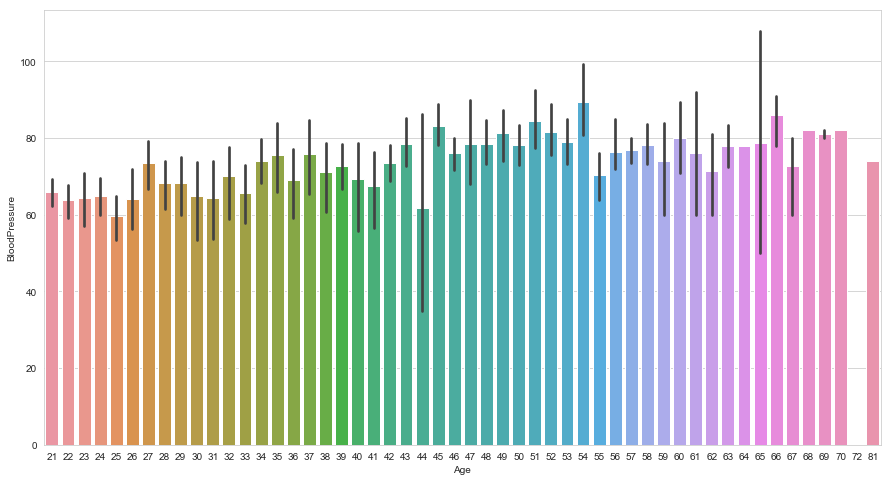

In [14]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x='Age',y='BloodPressure',data=df)

In [15]:
import cufflinks as cf
cf.go_offline()

In [16]:
df['BMI'].iplot(kind='hist',bins=40)

# Modeling

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
y=['Output']

In [20]:
df2=pd.DataFrame(data=df)  # if we do df2=df then it will take the reference
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],
                                               test_size=0.20,random_state=101)

In [22]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
709,2,93,64,32,160,38.0,0.674,23
425,4,184,78,39,277,37.0,0.264,31
135,2,125,60,20,140,33.8,0.088,31
630,7,114,64,0,0,27.4,0.732,34
500,2,117,90,19,71,25.2,0.313,21


In [23]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,0,0,30.1,0.349,47
748,3,187,70,22,200,36.4,0.408,36
42,7,106,92,18,0,22.7,0.235,48
485,0,135,68,42,250,42.3,0.365,24
543,4,84,90,23,56,39.5,0.159,25


In [24]:
# Training the data
from sklearn.linear_model import LogisticRegression

In [25]:
LRModel=LogisticRegression()


In [42]:
LRModel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
print("Training set score: {:.3f}".format(LRModel.score(x_train, y_train)))
print("Test set score: {:.3f}".format(LRModel.score(x_test, y_test)))

Training set score: 0.775
Test set score: 0.792


In [52]:
logreg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(x_test, y_test)))

Training set accuracy: 0.695
Test set accuracy: 0.701


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [53]:
logreg100 = LogisticRegression(C=100).fit(x_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(x_test, y_test)))

Training set accuracy: 0.777
Test set accuracy: 0.799


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



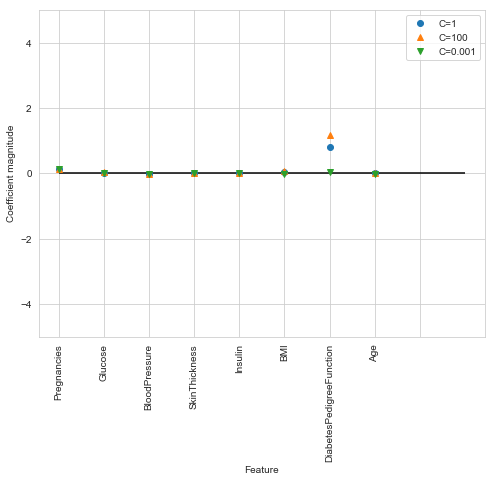

In [55]:
diabetes_features = [x for i,x in enumerate(df.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(LRModel.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(df.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, df.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

## Testing out model

In [43]:
prediction_diabetes=LRModel.predict(x_test)
prediction_diabetes

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,prediction_diabetes))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       103
           1       0.70      0.65      0.67        51

   micro avg       0.79      0.79      0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



In [46]:
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[1,130,126,60,30,30.1,0.349,47]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,130,126,60,30,30.1,0.349,47


In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
prediction_diabetes=LRModel.predict(paitentid_54)
print(prediction_diabetes)

[0]


In [49]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12    